# Build/train object model

In [1]:
%cd /Users/trancatkhanh/Downloads/Bag-of-visual-word

/Users/trancatkhanh/Downloads/Bag-of-visual-word


In [2]:
import argparse
import cv2
import numpy as np 
import os
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics.pairwise import chi2_kernel
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

Đọc ảnh 

In [3]:
def getFiles(train, path):
    images = []
    count = 0
    for folder in os.listdir(path):
        for file in  os.listdir(os.path.join(path, folder)):
            images.append(os.path.join(path, os.path.join(folder, file)))
    if(train is True):
        np.random.shuffle(images)
    return images 
def readImage(img_path):
    img = cv2.imread(img_path, 0)
    return cv2.resize(img,(150,150))  
test_images = getFiles(True, '/Users/trancatkhanh/Downloads/Bag-of-visual-word/dataset/train')
list_cac_anh = []
name_dict =	{
    "0": "background",
    "1": "face",
}
for img_path in test_images:
    img = readImage(img_path)
    if("face" in img_path):
        list_cac_anh.append("face")
    else:
        list_cac_anh.append("background")

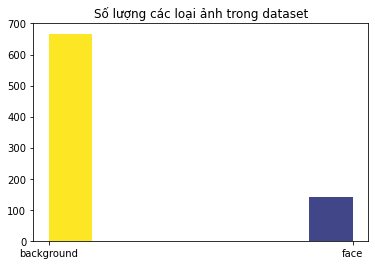

In [4]:
import numpy as np
from matplotlib import colors
fig, axs = plt.subplots()
N, bins, patches = axs.hist(list_cac_anh, bins=7)
fracs = N / N.max()

norm = colors.Normalize(fracs.min(), fracs.max())
plt.title("Số lượng các loại ảnh trong dataset")
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)


In [5]:
def getDescriptors(sift, img):
    kp, des = sift.detectAndCompute(img, None)
    return des

def readImage(img_path):
    img = cv2.imread(img_path, 0)
    return cv2.resize(img,(150,150))
images = getFiles(True,'/Users/trancatkhanh/Downloads/Bag-of-visual-word/dataset/train')
sift = cv2.SIFT_create()
descriptor_list = []
train_labels = np.array([])
label_count = 2
image_count = len(images)

for img_path in images:
    if("face" in img_path):
        class_index = 1
    else:
        class_index = 0

    train_labels = np.append(train_labels, class_index)
    img = readImage(img_path)
    des = getDescriptors(sift, img)
    descriptor_list.append(des)


In [6]:
def vstackDescriptors(descriptor_list):
# Stack arrays in sequence vertically (row wise).
    descriptors = np.array(descriptor_list[0])
    for descriptor in descriptor_list[1:]:
        descriptors = np.vstack((descriptors, descriptor)) 
    return descriptors

def clusterDescriptors(descriptors, no_clusters):
    kmeans = KMeans(n_clusters = no_clusters).fit(descriptors)
    return kmeans

def extractFeatures(kmeans, descriptor_list, image_count, no_clusters):
  
    im_features = np.array([np.zeros(no_clusters) for i in range(image_count)])

    for i in range(image_count):
        for j in range(len(descriptor_list[i])):
            feature = descriptor_list[i][j]
            feature = feature.reshape(1, 128)
            idx = kmeans.predict(feature)
            im_features[i][idx] += 1

    return im_features




k-means = 20

In [7]:
descriptors = vstackDescriptors(descriptor_list)
kmeans = clusterDescriptors(descriptors, 20)

im_features = extractFeatures(kmeans, descriptor_list, image_count, 20)

scale = StandardScaler().fit(im_features)        
im_features = scale.transform(im_features)


In [8]:
def findSVM(im_features, train_labels):
    features = im_features
    svm = SVC(kernel = 'linear',gamma = 'auto')
    svm.fit(features, train_labels)
    return svm
    
def findAccuracy(true, predictions):
    print ('accuracy score: %0.3f' % accuracy_score(true, predictions))

In [9]:
svm = findSVM(im_features, train_labels)
print("SVM fitted.")
print("Training completed.")

SVM fitted.
Training completed.


In [10]:
test_images = getFiles(False, '/Users/trancatkhanh/Downloads/Bag-of-visual-word/dataset/test')
count = 0
true = []
descriptor_list = []
name_dict =	{
    "0": "background",
    "1": "face",
}
sift = cv2.SIFT_create()
for img_path in test_images:
    img = readImage(img_path)
    des = getDescriptors(sift, img)
    if(des is not None):
        count += 1
        descriptor_list.append(des)
        if("face" in img_path):
            true.append("face")
        else:
            true.append("background")

descriptors = vstackDescriptors(descriptor_list)

test_features = extractFeatures(kmeans, descriptor_list, count, 20)

test_features = scale.transform(test_features)

kernel_test = test_features

predictions = [name_dict[str(int(i))] for i in svm.predict(kernel_test)]

findAccuracy(true, predictions)
print("Accuracy calculated.")


accuracy score: 0.909
Accuracy calculated.


['face']


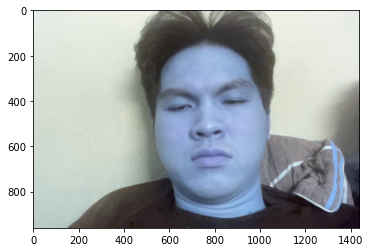

In [11]:
count = 0
descriptor_list = []
%matplotlib inline

img1 = cv2.imread('/Users/trancatkhanh/Downloads/2.png')

plt.imshow(img1)
name_dict =	{
    "0": "background",
    "1": "face",
}
sift = cv2.SIFT_create()
img = readImage('/Users/trancatkhanh/Downloads/1.png')
des = getDescriptors(sift, img)
if(des is not None):
    count += 1
    descriptor_list.append(des)
descriptors = vstackDescriptors(descriptor_list)
test_features = extractFeatures(kmeans, descriptor_list, count, 20)
test_features = scale.transform(test_features)
kernel_test = test_features


predictions = [name_dict[str(int(i))] for i in svm.predict(kernel_test)]
print(predictions)


# Generate candidates in new image

imutils


A series of convenience functions to make basic image processing functions such as translation, rotation, resizing, skeletonization, displaying Matplotlib images, sorting contours, detecting edges, and much more easier with OpenCV and both Python 2.7 and Python 3.

In [12]:
# import the necessary packages
import imutils
def pyramid(image, scale=1.5, minSize=(30, 30)):
	yield image
	# keep looping over the pyramid
	while True:
		# compute the new dimensions of the image and resize it
		w = int(image.shape[1] / scale)
		image = imutils.resize(image, width=w)
		# if the resized image does not meet the supplied minimum
		# size, then stop constructing the pyramid
		if image.shape[0] < minSize[1] or image.shape[1] < minSize[0]:
			break
		# yield the next image in the pyramid
		yield image

def sliding_window(image, stepSize, windowSize):
#  two for loops that loop over the (x, y) coordinates of the image, incrementing x and y  by the provided step size.
	for y in range(0, image.shape[0], stepSize):
		for x in range(0, image.shape[1], stepSize):
			yield (x, y, image[y:y + windowSize[1], x:x + windowSize[0]])

In [30]:
# import the necessary packages

import argparse
import time
import cv2

# load the image and define the window width and height
image = cv2.imread('/Users/trancatkhanh/Downloads/2.png')
(winW, winH) = (128, 128)
image = cv2.resize(image, (349,202))
# loop over the image pyramid
for resized in pyramid(image, scale=1.5):
  # loop over the sliding window for each layer of the pyramid
  for (x, y, window) in sliding_window(resized, stepSize=32, windowSize=(winW, winH)):
    # if the window does not meet our desired window size, ignore it
    if window.shape[0] != winH or window.shape[1] != winW:
      continue
    # classifier here
    count = 0
    descriptor_list = []
    name_dict = {
        "0": "background",
        "1": "face",
    }
    sift = cv2.SIFT_create()
    des = getDescriptors(sift, window)
    if(des is not None):
        count += 1
        descriptor_list.append(des)
    descriptors = vstackDescriptors(descriptor_list)
    test_features = extractFeatures(kmeans, descriptor_list, count, 20)
    test_features = scale.transform(test_features)
    kernel_test = test_features
    predictions = [name_dict[str(int(i))] for i in svm.predict(kernel_test)]
    # draw the windows and label them
    if predictions == ['face']:
      clone = resized.copy()
      cv2.rectangle(clone, (x, y), (x + winW, y + winH), (0, 255, 0), 2)
      cv2.putText(clone, text= str(predictions), org=(20,20),
              fontFace= cv2.FONT_HERSHEY_SIMPLEX, fontScale=1, color=(0,0,0),
              thickness=2, lineType=cv2.LINE_AA)
      cv2.imshow("Window", clone)
      cv2.waitKey(1)
      time.sleep(0.5)

: 

# Apply Non Maximum Supression

In [15]:
def overlapping_area(detection_1, detection_2):
    '''
    Function to calculate overlapping area'si
    `detection_1` and `detection_2` are 2 detections whose area
    of overlap needs to be found out.
    Each detection is list in the format ->
    [x-top-left, y-top-left, confidence-of-detections, width-of-detection, height-of-detection]
    #0           # 1        #2                        #3                   #4
    The function returns a value between 0 and 1,
    which represents the area of overlap.
    0 is no overlap and 1 is complete overlap.
    Area calculated from ->
    http://math.stackexchange.com/questions/99565/simplest-way-to-calculate-the-intersect-area-of-two-rectangles
    '''
    # Calculate the x-y co-ordinates of the 
    # rectangles
    x1_tl = detection_1[0]
    x2_tl = detection_2[0]
    x1_br = detection_1[0] + detection_1[2]
    x2_br = detection_2[0] + detection_2[2]
    y1_tl = detection_1[1]
    y2_tl = detection_2[1]
    y1_br = detection_1[1] + detection_1[3]
    y2_br = detection_2[1] + detection_2[3]
    # Calculate the overlapping Area
    x_overlap = max(0, min(x1_br, x2_br)-max(x1_tl, x2_tl))
    y_overlap = max(0, min(y1_br, y2_br)-max(y1_tl, y2_tl))
    overlap_area = x_overlap * y_overlap
    area_1 = detection_1[2] * detection_2[3]
    area_2 = detection_2[2] * detection_2[3]
    total_area = area_1 + area_2 - overlap_area
    return overlap_area / float(total_area)

def nms(detections, threshold=.5):
    '''
    This function performs Non-Maxima Suppression.
    `detections` consists of a list of detections.
    Each detection is in the format ->
    [x-top-left, y-top-left, confidence-of-detections, width-of-detection, height-of-detection]
    If the area of overlap is greater than the `threshold`,
    the area with the lower confidence score is removed.
    The output is a list of detections.
    '''
    if len(detections) == 0:
      return []
    # Sort the detections based on confidence score
    detections = sorted(detections, key=lambda detections: detections[2],
            reverse=True)
    # Unique detections will be appended to this list
    new_detections=[]
    # Append the first detection
    new_detections.append(detections[0])
    # Remove the detection from the original list
    del detections[0]
    # For each detection, calculate the overlapping area
    # and if area of overlap is less than the threshold set
    # for the detections in `new_detections`, append the 
    # detection to `new_detections`.
    # In either case, remove the detection from `detections` list.
    for index, detection in enumerate(detections):
        for new_detection in new_detections:
            if overlapping_area(detection, new_detection) > threshold:
                del detections[index]
                break
        else:
            new_detections.append(detection)
            del detections[index]
    return new_detections


In [18]:
# import the necessary packages

import argparse
import time
import cv2

# load the image and define the window width and height
image = cv2.imread('/Users/trancatkhanh/Downloads/2.png')
(winW, winH) = (128, 128)
image = cv2.resize(image, (349,202))
detections = []

# loop over the image pyramid
for resized in pyramid(image, scale=1.5):
  # loop over the sliding window for each layer of the pyramid
  for (x, y, window) in sliding_window(resized, stepSize=32, windowSize=(winW, winH)):
    # if the window does not meet our desired window size, ignore it
    if window.shape[0] != winH or window.shape[1] != winW:
      continue
    # classifier here
    count = 0
    descriptor_list = []
    name_dict = {
        "0": "background",
        "1": "face",
    }
    sift = cv2.SIFT_create()
    des = getDescriptors(sift, window)
    if(des is not None):
        count += 1
        descriptor_list.append(des)
    descriptors = vstackDescriptors(descriptor_list)
    test_features = extractFeatures(kmeans, descriptor_list, count, 20)
    test_features = scale.transform(test_features)
    kernel_test = test_features
    predictions = [name_dict[str(int(i))] for i in svm.predict(kernel_test)]
    if predictions == ['face']:
      clone = resized.copy()
      detections.append([x, y, winW, winH])
detections = nms(detections, 0.5)
for (x_tl, y_tl,  w, h) in detections:
    cv2.rectangle(image, (x_tl, y_tl), (x_tl + w, y_tl + h), (0, 0, 255))
    cv2.imshow("Window", image)
    cv2.putText(clone, text= str('face'), org=(20,20),
            fontFace= cv2.FONT_HERSHEY_SIMPLEX, fontScale=1, color=(0,0,0),
            thickness=2, lineType=cv2.LINE_AA)
    cv2.waitKey(1)
    time.sleep(0.5)

: 